## Purpose: extract and plot a by-region summary of depth profiles of any given model variable


In [359]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


##### available variables, for reference


ptrc - ['deptht_bounds',
 'Alkalini',
 'time_centered_bounds',
 'time_counter_bounds',
 'O2',
 'DIC',
 'PIIC',
 'NO3',
 'Si',
 'PO4',
 'Fer',
 'DOC',
 'CaCO3',
 'ARA',
 'POC',
 'GOC',
 'BAC',
 'PRO',
 'PTE',
 'MES',
 'GEL',
 'MAC',
 'DIA',
 'MIX',
 'COC',
 'PIC',
 'PHA',
 'FIX',
 'C11',
 'B14B',
 'C14B',
 'D14B']
 
 diad - ['deptht_bounds',
 'DOCTRP',
 'time_centered_bounds',
 'time_counter_bounds',
 'EXP',
 'GRAMIC',
 'GRAMES',
 'GRAMAC',
 'PPTDOC',
 'PPT',
 'TChl',
 'Detrit',
 'Carniv',
 'Herbiv',
 'GRAMICPHY',
 'GRAMESPHY',
 'GRAMACPHY',
 'nitrfix',
 'denitr',
 'DELO2',
 'vsink',
 'sinksil',
 'discarb',
 'ExpCO3',
 'ExpARA',
 'GRAGEL',
 'GRAPTE',
 'proara',
 'prococ',
 'D14PRO',
 'D14RES',
 'fdecay',
 'bdecay',
 'ddecay',
 'qtrC14b',
 'qtrB14b',
 'qtrD14b',
 'qintC14b',
 'Cflx',
 'PICflx',
 'Oflx',
 'dpCO2',
 'pCO2',
 'PPINT']

grid_T - ['deptht_bounds',
 'e3t',
 'time_centered_bounds',
 'time_counter_bounds',
 'votemper',
 'vosaline',
 'tos',
 'sos',
 'zos',
 'mldkz5',
 'mldr10_1',
 'somxl030',
 'wfo',
 'rsntds',
 'tohfls',
 'sosflxdo',
 'taum',
 'sowindsp',
 'soprecip',
 'sbt']

# define model/variable/etc in code cell below

### model data:
- model, years to extract, file pattern, variable name, directory,

### choices about script:
- bottom of depth profile for plotting, are we saving depth profiles, are we saving summary figure

In [360]:
tr = 'TOM12_RW_3G07' #model
ys = 1955; ye = 1960 # years
dtype = 'diad' # filetype
vname = 'TChl' # varname
baseDir = '/gpfs/data/greenocean/software/runs/' #directory where model found
botofdepthprofile = -600
saveDPs = True
saveSummaryFig = True

- import relevant packages

In [361]:
import numpy as np
from cmocean import cm
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import glob


plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [362]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


Define and plot subregions and create numerical mask for analysis, calculate grid masks, etc

In [363]:
plothorse = True

Text(0.5, 0.98, 'colours assigned')

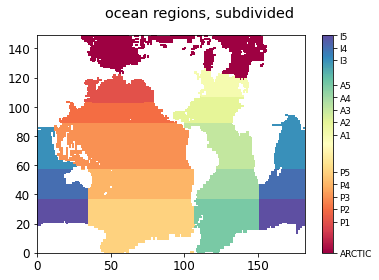

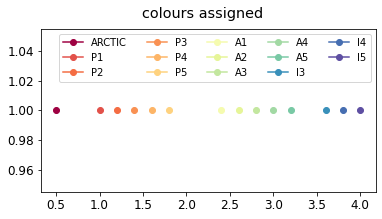

In [364]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan


w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics)
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

fact = 0.2
fig = plt.figure(figsize=(30*fact,15*fact))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)
plt.suptitle('colours assigned')

In [365]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
depths = (tmesh['gdept_1d'][0])

w2 = xr.open_dataset('//gpfs/data/greenocean/software/runs/TOM12_TJ_1ASA/ORCA2_1m_19900101_19901231_ptrc_T.nc')

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] #size in m3

csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values #broadcast area 
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:] # multiply by e3t and size, volume in m3


In [366]:
# look at volume of cells 
# w = plt.pcolormesh(cvol[27,:,:])
# plt.colorbar(w)

- open dataset from list of file names with xarray (made using yearlist function)

In [367]:
## yearlist
def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

In [368]:
ylist = make_yearlist(ys, ye, dtype, tr, baseDir) # list of files to open
ds = xr.open_mfdataset(ylist) # open file
tdat = ds[vname] #retreive variable 
units = tdat.units #retrieve units
datnam = tdat.long_name # retrieve name 

ylist = make_yearlist(ys, ye, 'grid_T', tr, baseDir) # list of files to open
ds = xr.open_mfdataset(ylist) # open file

- calculate monthly and yearly mean (whole domain) 
- sanity check: plot yearly mean and monthly mean of surface quantity

In [369]:
monthly_mean = tdat.groupby('time_counter.month').mean('time_counter').values#.groupby('time_counter.year').mean()   ## monthly mean for this timeperiod
yearly_mean = np.nanmean(tdat.resample(time_counter="Y").mean().values, axis = 0)


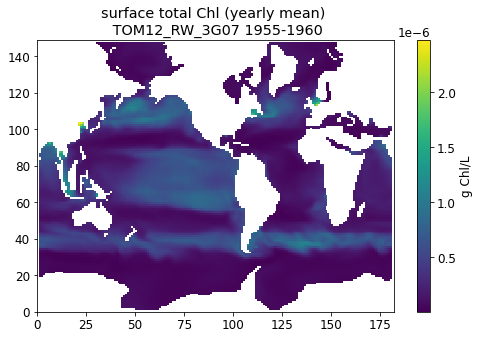

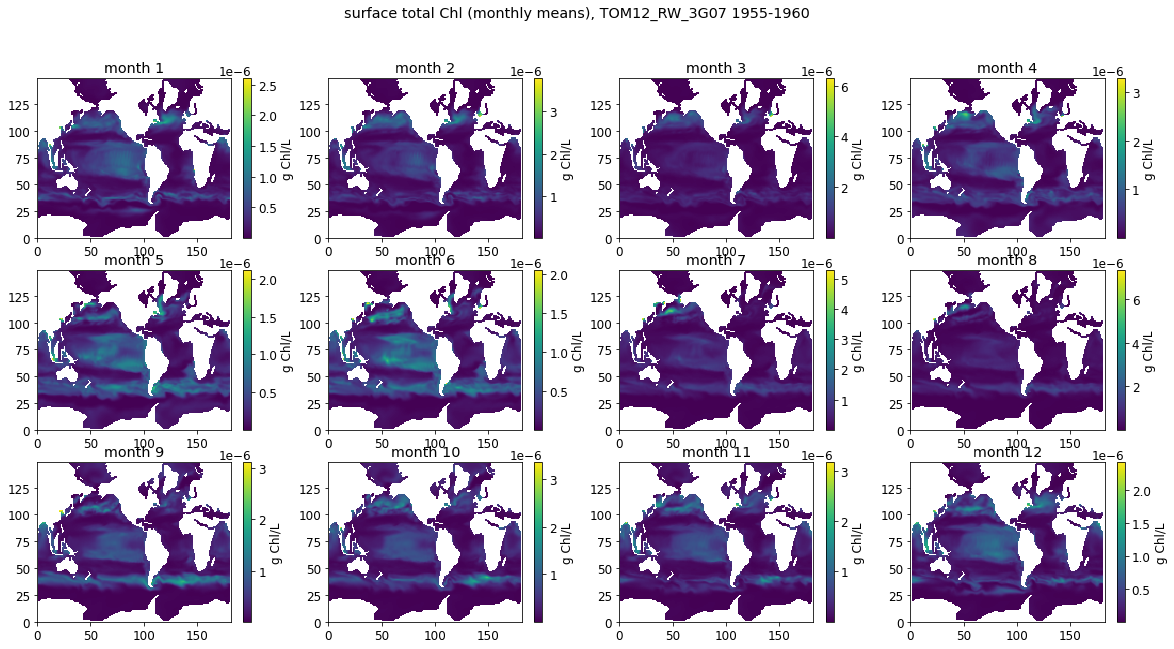

In [370]:
fact = 1    
fig, axs = plt.subplots(1,1, figsize=(8*fact, 5*fact), facecolor='w', edgecolor='k')
yearly_mean[yearly_mean == 0] = np.nan
w = axs.pcolormesh(yearly_mean[0,:,:])
axs.set_title(f'surface {datnam} (yearly mean) \n {tr} {ys}-{ye}')
plt.colorbar(w, ax = axs, label = units)

fact = 2    
fig, axs = plt.subplots(3,4, figsize=(10*fact, 5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
monthly_mean[monthly_mean == 0] = np.nan
for i in range(0,12):
    w = axs[i].pcolormesh(monthly_mean[i,0,:,:])
    axs[i].set_title(f'month {i+1}')
    plt.suptitle(f'surface {datnam} (monthly means), {tr} {ys}-{ye}')
    plt.colorbar(w, ax = axs[i], label = units)

- calculate depth profiles, seasonally and yearly
- both for full globe and by region

In [371]:
## 0s to nans
yearly_mean[yearly_mean == 0] = np.nan
monthly_mean[monthly_mean == 0] = np.nan
yearly_mean = np.ma.masked_array(yearly_mean, np.isnan(yearly_mean))
monthly_mean = np.ma.masked_array(monthly_mean, np.isnan(monthly_mean))

yearly_mean_dp_fg = np.zeros([31])
monthly_mean_dp_fg = np.zeros([12, 31])
for i in range(0,31):
    yearly_mean_dp_fg[i] = np.ma.average(yearly_mean[i,:,:], weights = cvol[i,:,:])

for m in range(0,12):    
    for i in range(0,31):
        monthly_mean_dp_fg[m,i] = np.ma.average(monthly_mean[m,i,:,:], weights = cvol[i,:,:])
    # ALK_mean[i] = np.ma.average(ALK[i,:,:], weights = cvol[i,:,:]) * 1e6

In [372]:
## array of region numbers (for later storing in netcdf dataset)
regnos = []

for r in range(0,len(regs)):
    regnos.append(regdict[regs[r]]['number'])
    
regnos = np.array(regnos)

In [373]:
plothorse = False #are we plotting as we save these depth profiles? (will plot later)


yearly_mean_dp = np.zeros([14, 31])
monthly_mean_dp = np.zeros([14, 12, 31])

tcm = cm.phase
for r in range(0, len(regs)):
    
    regmask = np.zeros_like(maskno)
    regmask[maskno == regdict[regs[r]]['number']] = 1
    for i in range(0,31):
        
        yearly_mean_dp[r,i] = np.ma.average(yearly_mean[i,:,:], weights = cvol[i,:,:]*regmask)

    for m in range(0,12):    
        for i in range(0,31):
            monthly_mean_dp[r,m,i] = np.ma.average(monthly_mean[m,i,:,:], weights = cvol[i,:,:]*regmask)
    
    if plothorse:
        plt.figure()
        plt.plot(yearly_mean_dp[r,:], -depths, color = 'k', linewidth = 2.5)
        for m in range(0,12):
            plt.plot(monthly_mean_dp[r,m,:], -depths, color = tcm(1.*m/12), linewidth = 1, label = f'month {m+1}')
        plt.ylim([-600,0])
        plt.title(regs[r])
        
    


In [374]:
data_vars = {'yearly_mean':(['regno', 'depth'], yearly_mean_dp,
                         {'units': units,
                          'long_name': datnam}),
             'monthly_mean':(['regno', 'month', 'depth'], monthly_mean_dp,
                         {'units': units,
                          'long_name': datnam}),
             'yearly_mean_fg':(['depth'], yearly_mean_dp_fg,
                         {'units': units,
                          'long_name': datnam}),
             'monthly_mean_fg':(['month', 'depth'], monthly_mean_dp_fg,
                         {'units': units,
                          'long_name': datnam}),
            }

# define coordinates
coords = {'regno': (['regno'], regnos),\
         'month': (['month'], np.arange(1,13,1)),\
         'depth': (['depth'], depths)}

# define global attributes
attrs = {'made in':'github/tjarnikova/AnalysisRobot/depthprofile_template.ipynb',
         'code author':'TJŠJ, T.Jarnikova@uea.ac.uk'
        }
            
# create dataset
ds = xr.Dataset(data_vars=data_vars,
                coords=coords,
                attrs=attrs)

if saveDPs:
    ds.to_netcdf(f'./EXTRACTED/DP/DPsummary_{vname}_{tr}_{ys}-{ye}.nc')

DPsummary_TChl_TOM12_RW_3G07_1955-1960.jpg


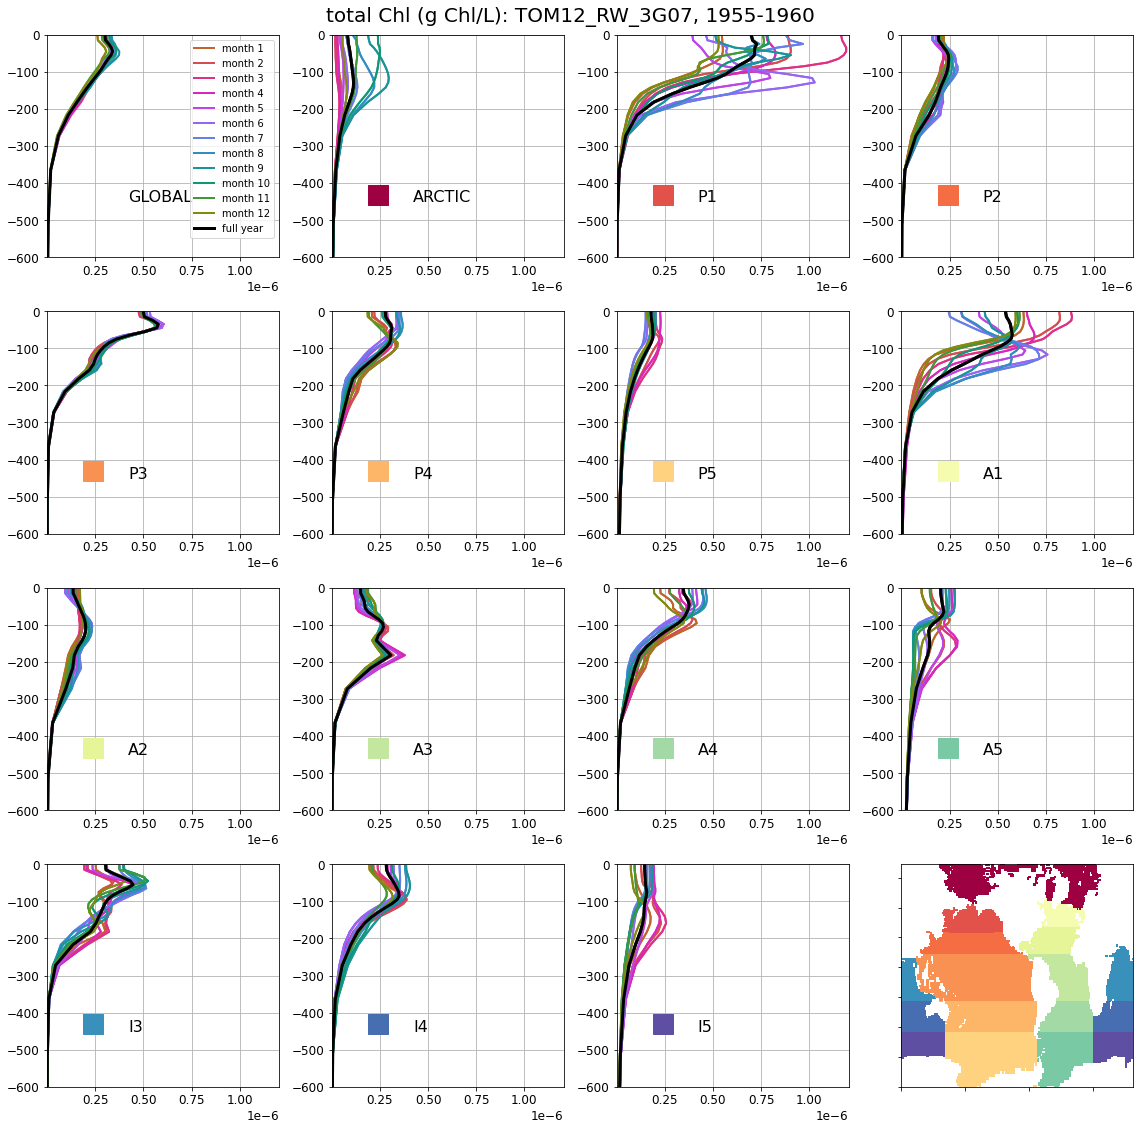

In [375]:

#define x and y limits 
xl1 = np.nanmin(ds.monthly_mean.values) ; xl2 = np.nanmax(ds.monthly_mean.values)*1.01
yl1 = botofdepthprofile; yl2 = -0
stit = f'{datnam} ({units}): {tr}, {ys}-{ye}'
fit = f'DPsummary_{vname}_{tr}_{ys}-{ye}.jpg'
print(fit)

fact = 1
fig, axs = plt.subplots(4,4, figsize=(16*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()



### this bit just plots our background
axs[15].pcolor(maskno, cmap = 'Spectral', vmin = 0.5, vmax = 4)
axs[15].set_xticklabels([])
axs[15].set_yticklabels([])
axs[0].text(xl1+0.35*(xl2-xl1),yl1+0.25*(yl2-yl1),'GLOBAL', color = 'k', fontsize = 16)

# full globe means
for m in range(1,13):
    axs[0].plot(ds.monthly_mean_fg.sel(month = m),-ds.depth,\
              color = tcm(1.*(m)/13), linewidth = 2, label = f'month {m}')
axs[0].plot(ds.yearly_mean_fg.values,-ds.depth, color = 'k', linewidth = 3, label = 'full year')

#regional means
for i in range(0, len(regs)):
    for m in range(1,13):
        axs[i+1].plot(ds.monthly_mean.sel(regno = regdict[regs[i]]['number'], month = m),-ds.depth,\
                  color = tcm(1.*(m)/13), linewidth = 2, label = f'month {m}')

    axs[i+1].plot(ds.yearly_mean.sel(regno = regdict[regs[i]]['number']),-ds.depth, color = 'k', linewidth = 3, label = 'full year')


for i in range(0,len(regs)):
    axs[i+1].plot(xl1+0.2*(xl2-xl1),yl1+0.28*(yl2-yl1),marker = "s", color = regdict[regs[i]]['colour'], markersize = 20)
    axs[i+1].text(xl1+0.35*(xl2-xl1),yl1+0.25*(yl2-yl1),regs[i], color = 'k', fontsize = 16)
for i in range(0,len(regs)+1):
    axs[i].set_xlim([xl1, xl2])
    axs[i].set_ylim([yl1,yl2])
    axs[i].grid()
    
###
for i in range(0,len(regs)):
    for m in range(1,13):
        axs[i+1].plot(ds.monthly_mean.sel(regno = regdict[regs[i]]['number'], month = m),-ds.depth,\
                  color = tcm(1.*(m)/13), linewidth = 2, label = f'month {m}')

    axs[i+1].plot(ds.yearly_mean.sel(regno = regdict[regs[i]]['number']),-ds.depth, color = 'k', linewidth = 3, label = 'full year')
    
    

axs[0].legend(fontsize = 10)

plt.suptitle(stit, fontsize = 20, y = 0.98)
plt.tight_layout()

if saveSummaryFig:
    plt.savefig(f'./EXTRACTED/DPfig/{fit}')

In [ ]:
print('c